In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import tensorflow as tf
print(tf.__version__)

import keras
print(keras.__version__)

import numpy as np
print(np.__version__)

2.15.0
2.15.0
1.23.5


In [ ]:
!pip install tensorflow==2.15.0
!pip install keras==2.4.0

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 46% 7.00M/15.1M [00:00<00:00, 73.3MB/s]
100% 15.1M/15.1M [00:00<00:00, 102MB/s] 


In [ ]:
import zipfile
zip_file_path = '/content/brain-mri-images-for-brain-tumor-detection.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/brain_tumor_dataset')

In [ ]:
import os
import random
import csv

# Path to the data folder containing the two class folders (yes and no)
data_folder = "brain_tumor_dataset"

# List to store image paths and corresponding labels
data = []

# Loop through each class folder
for class_label in ["yes", "no"]:
    class_folder = os.path.join(data_folder, class_label)
    # Get list of image files in the folder
    images = os.listdir(class_folder)
    # Iterate through each image
    for img in images:
        # Append image path and corresponding label to the data list
        data.append((os.path.join(class_label, img), 1 if class_label == "yes" else 0))

# Shuffle the data
random.shuffle(data)

# Path to save the CSV file
csv_file = "data.csv"

# Write data to CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['Image', 'Label'])
    # Write data rows
    writer.writerows(data)

print("CSV file created successfully.")


CSV file created successfully.


In [ ]:
from datetime import datetime
import time

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, Dense, GlobalAveragePooling2D, BatchNormalization, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, Dense, GlobalAveragePooling2D, BatchNormalization
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import time
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time
import os

In [ ]:
import os
import csv
import random
import shutil

# Load data from CSV file
csv_file = "data.csv"
data = []
with open(csv_file, 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Skip header
    for row in reader:
        data.append(row)

# Shuffle the data
random.shuffle(data)

# Calculate the number of samples for test data
test_size = int(0.3 * len(data))

# Split data into train and test sets
test_data = data[:test_size]
train_data = data[test_size:]

# Create folders for train and test data
train_folder = "Training"
test_folder = "Testing"
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Function to copy images to destination folder
def copy_images(data, destination_folder):
    for row in data:
        image_path = row[0]
        label = row[1]
        class_folder = os.path.join(destination_folder, "yes" if label == '1' else "no")
        os.makedirs(class_folder, exist_ok=True)
        shutil.copy(os.path.join("brain_tumor_dataset", image_path), class_folder)

# Copy train and test images to respective folders
copy_images(train_data, train_folder)
copy_images(test_data, test_folder)

print("Train and test data copied to train and test folders.")

Train and test data copied to train and test folders.


In [ ]:
from tensorflow import keras

# Constants
img_width, img_height = 224, 224
batch_size = 32
input_shape = (img_width, img_height, 3)
epochs = 10

# Set up data generators
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    '/content/Training',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 178 images belonging to 2 classes.
Found 75 images belonging to 2 classes.


**Simple CNN**

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



# Define CNN model
def create_simple_cnn():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Create CNN model
simple_cnn_model = create_simple_cnn()

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
simple_cnn_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
start_time = time.time()
history = simple_cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
end_time = time.time()

# Evaluate the model on test data
test_generator = test_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_loss, test_acc = simple_cnn_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Print process time and metrics
print(f'Time taken: {end_time - start_time} seconds')
print(f'Training Acc: {np.mean(history.history["accuracy"])}')
print(f'Validation Acc: {np.mean(history.history["val_accuracy"])}')
print(f'Test Acc: {test_acc}')

Epoch 1/10
5/5 [==============================] - 53s 10s/step - loss: 1.8917 - accuracy: 0.4658 - val_loss: 0.5902 - val_accuracy: 0.7969
Epoch 2/10
5/5 [==============================] - 58s 12s/step - loss: 0.6564 - accuracy: 0.7260 - val_loss: 0.6184 - val_accuracy: 0.7188
Epoch 3/10
5/5 [==============================] - 51s 10s/step - loss: 0.5073 - accuracy: 0.8082 - val_loss: 0.4430 - val_accuracy: 0.8281
Epoch 4/10
5/5 [==============================] - 56s 12s/step - loss: 0.5221 - accuracy: 0.7466 - val_loss: 0.4704 - val_accuracy: 0.7969
Epoch 5/10
5/5 [==============================] - 55s 12s/step - loss: 0.4523 - accuracy: 0.8082 - val_loss: 0.4308 - val_accuracy: 0.8125
Epoch 6/10
5/5 [==============================] - 55s 11s/step - loss: 0.4104 - accuracy: 0.8313 - val_loss: 0.3988 - val_accuracy: 0.8750
Epoch 7/10
5/5 [==============================] - 62s 13s/step - loss: 0.3523 - accuracy: 0.8493 - val_loss: 0.3701 - val_accuracy: 0.8438
Epoch 8/10
5/5 [===========

**vgg16**

In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers in the base model
base_model.trainable = False

# Build the model on top of the VGG16 base
model = keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
end_time = time.time()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Print process time and metrics
print(f'Time taken: {end_time - start_time} seconds')
print(f'Training Acc: {np.mean(history.history["accuracy"])}')
print(f'Validation Acc: {np.mean(history.history["val_accuracy"])}')
print(f'Test Acc: {test_acc}')

Epoch 1/10
5/5 [==============================] - 137s 29s/step - loss: 2.0931 - accuracy: 0.5688 - val_loss: 0.3474 - val_accuracy: 0.8281
Epoch 2/10
5/5 [==============================] - 132s 28s/step - loss: 1.0206 - accuracy: 0.6233 - val_loss: 0.5826 - val_accuracy: 0.8125
Epoch 3/10
5/5 [==============================] - 127s 29s/step - loss: 1.1033 - accuracy: 0.7192 - val_loss: 0.4944 - val_accuracy: 0.8125
Epoch 4/10
5/5 [==============================] - 125s 27s/step - loss: 0.5695 - accuracy: 0.8014 - val_loss: 0.6882 - val_accuracy: 0.7969
Epoch 5/10
5/5 [==============================] - 134s 28s/step - loss: 0.4499 - accuracy: 0.8425 - val_loss: 0.4305 - val_accuracy: 0.8281
Epoch 6/10
5/5 [==============================] - 127s 27s/step - loss: 0.4317 - accuracy: 0.8288 - val_loss: 0.3269 - val_accuracy: 0.8594
Epoch 7/10
5/5 [==============================] - 132s 28s/step - loss: 0.3287 - accuracy: 0.8630 - val_loss: 0.4884 - val_accuracy: 0.7656
Epoch 8/10
5/5 [====

**Bayes by Backpropagation**

 incorporate regularization techniques such as L2 regularization and dropout.


 the learning rate is reduced to 0.0001, and the strength of regularization is increased to 0.001. These changes aim to help the model converge to a lower loss value.

In [ ]:
from tensorflow.keras import regularizers

# Define Bayesian Neural Network model with increased capacity and regularization
def bayesian_model_regularized():
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(64, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(128, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(256, 3, activation="relu", kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

# Define and compile the Bayesian model
bayesian_model = bayesian_model_regularized()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Adjust learning rate
bayesian_model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Track training, validation, and test accuracy
train_accs = []
val_accs = []

# Train the Bayesian model
start_time = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    history = bayesian_model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size
    )
    train_accs.append(history.history['accuracy'][0])
    val_accs.append(history.history['val_accuracy'][0])

end_time = time.time()

# Evaluate the model on test data
test_loss, test_acc = bayesian_model.evaluate(test_generator)
print(f'Test accuracy (Bayesian Model): {test_acc}')
print(f'Test loss (Bayesian Model): {test_loss}')

# Calculate validation-test mismatch
val_test_mismatch = np.abs(np.mean(val_accs) - test_acc)

# Print process time and metrics
print(f'Time taken: {end_time - start_time} seconds')
print(f'Training Acc (Bayesian Model): {np.mean(train_accs)}')
print(f'Validation Acc (Bayesian Model): {np.mean(val_accs)}')
print(f'Test Acc (Bayesian Model): {test_acc}')
#print(f'Val-Test Mismatch: {val_test_mismatch}')

Epoch 1/10
5/5 [==============================] - 65s 14s/step - loss: 2.1587 - accuracy: 0.6712 - val_loss: 0.9039 - val_accuracy: 0.7969
Epoch 2/10
5/5 [==============================] - 68s 14s/step - loss: 1.2944 - accuracy: 0.8000 - val_loss: 0.9074 - val_accuracy: 0.6719
Epoch 3/10
5/5 [==============================] - 63s 14s/step - loss: 0.6713 - accuracy: 0.8699 - val_loss: 0.9115 - val_accuracy: 0.6094
Epoch 4/10
5/5 [==============================] - 63s 13s/step - loss: 0.6191 - accuracy: 0.8630 - val_loss: 0.8931 - val_accuracy: 0.6719
Epoch 5/10
5/5 [==============================] - 65s 13s/step - loss: 0.3514 - accuracy: 0.9625 - val_loss: 0.9158 - val_accuracy: 0.7969
Epoch 6/10
5/5 [==============================] - 60s 13s/step - loss: 0.3847 - accuracy: 0.9658 - val_loss: 0.9067 - val_accuracy: 0.7969
Epoch 7/10
5/5 [==============================] - 68s 14s/step - loss: 0.3169 - accuracy: 0.9812 - val_loss: 0.9123 - val_accuracy: 0.8438
Epoch 8/10
5/5 [===========

**Bayesian Neural Network (BNN) using the traditional approach**

In [ ]:
# Define Bayesian Neural Network model
def create_bayesian_model():
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, 3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(128, 3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

# Define and compile the Bayesian model
bayesian_model = create_bayesian_model()
bayesian_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# Track training, validation, and test accuracy
train_accs = []
val_accs = []

# Train the Bayesian model
start_time = time.time()
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    history = bayesian_model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=1,
        validation_data=validation_generator,  # Provide validation data here
        validation_steps=validation_generator.samples // batch_size
    )
    train_accs.append(history.history['accuracy'][0])
    val_accs.append(history.history.get('val_accuracy', [0])[0])  # Use get() method to handle missing validation accuracy

end_time = time.time()

# Evaluate the model on test data
test_loss, test_acc = bayesian_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Calculate validation-test mismatch
val_test_mismatch = np.abs(np.mean(val_accs) - test_acc)

# Print process time and metrics
print(f'Time taken: {end_time - start_time} seconds')
print(f'Training Acc: {np.mean(train_accs)}')
print(f'Validation Acc: {np.mean(val_accs)}')
print(f'Test Acc: {test_acc}')
print(f'Val-Test Mismatch: {val_test_mismatch}')


Epoch 1/10
5/5 [==============================] - 19s 4s/step - loss: 0.5919 - accuracy: 0.6918 - val_loss: 0.4522 - val_accuracy: 0.7969
Epoch 2/10
5/5 [==============================] - 18s 4s/step - loss: 0.5214 - accuracy: 0.7466 - val_loss: 0.4974 - val_accuracy: 0.7500
Epoch 3/10
5/5 [==============================] - 18s 4s/step - loss: 0.4616 - accuracy: 0.8288 - val_loss: 0.4772 - val_accuracy: 0.7969
Epoch 4/10
5/5 [==============================] - 20s 4s/step - loss: 0.4462 - accuracy: 0.8062 - val_loss: 0.4284 - val_accuracy: 0.8125
Epoch 5/10
5/5 [==============================] - 18s 4s/step - loss: 0.4094 - accuracy: 0.8219 - val_loss: 0.3648 - val_accuracy: 0.8438
Epoch 6/10
5/5 [==============================] - 17s 4s/step - loss: 0.3162 - accuracy: 0.8630 - val_loss: 0.3443 - val_accuracy: 0.8594
Epoch 7/10
5/5 [==============================] - 17s 4s/step - loss: 0.2579 - accuracy: 0.8904 - val_loss: 0.3431 - val_accuracy: 0.8438
Epoch 8/10
5/5 [==================

**2D cnn**

Epoch 1/10
6/6 [==============================] - 21s 3s/step - loss: 4.2075 - accuracy: 0.5000 - val_loss: 0.7224 - val_accuracy: 0.5200
Epoch 2/10
6/6 [==============================] - 19s 3s/step - loss: 0.6215 - accuracy: 0.5899 - val_loss: 0.5529 - val_accuracy: 0.7067
Epoch 3/10
6/6 [==============================] - 18s 3s/step - loss: 0.5581 - accuracy: 0.7472 - val_loss: 0.5475 - val_accuracy: 0.7733
Epoch 4/10
6/6 [==============================] - 19s 3s/step - loss: 0.4693 - accuracy: 0.7865 - val_loss: 0.4752 - val_accuracy: 0.8133
Epoch 5/10
6/6 [==============================] - 18s 3s/step - loss: 0.4157 - accuracy: 0.8034 - val_loss: 0.4855 - val_accuracy: 0.8133
Epoch 6/10
6/6 [==============================] - 19s 3s/step - loss: 0.3401 - accuracy: 0.8652 - val_loss: 0.3876 - val_accuracy: 0.8533
Epoch 7/10
6/6 [==============================] - 18s 3s/step - loss: 0.2414 - accuracy: 0.9101 - val_loss: 0.3622 - val_accuracy: 0.8800
Epoch 8/10
6/6 [==================

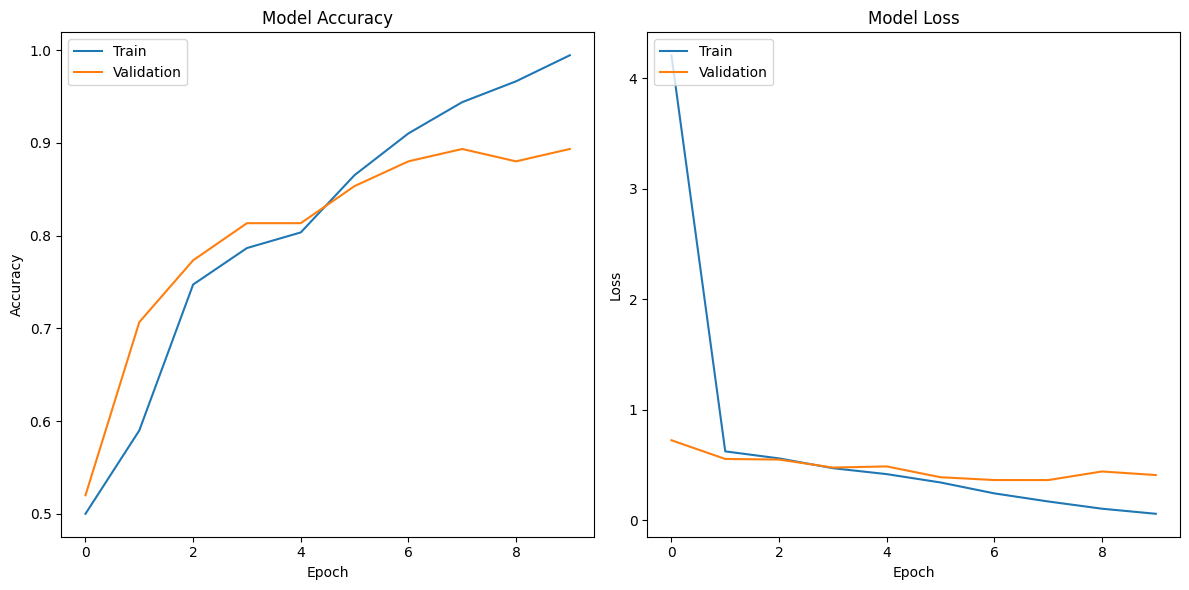

In [ ]:
# Define the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Record the start time
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Print process time and metrics
print(f'Time taken: {end_time - start_time} seconds')
print(f'Training Acc: {np.mean(history.history["accuracy"])}')
print(f'Validation Acc: {np.mean(history.history["val_accuracy"])}')
print(f'Test Acc: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


**U-Net**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, BatchNormalization, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp

tfd = tfp.distributions

def unet(input_shape=(256, 256, 3)):
    inputs = Input(input_shape)

    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Batch normalization for better convergence
    conv9 = BatchNormalization()(conv9)

    # Global average pooling to collapse spatial dimensions
    gap = GlobalAveragePooling2D()(conv9)

    # Output layer with sigmoid activation for binary classification
    outputs = Dense(1, activation='sigmoid')(gap)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define Bayesian U-Net model
def bayesian_unet(input_shape=(256, 256, 3)):
    inputs = Input(input_shape)

    # Define priors for weights
    prior_scale = 1.0
    w_prior = tfd.Normal(loc=0., scale=prior_scale)

    conv1 = Conv2D(64, 3, padding='same')(inputs)
    conv1 = Conv2D(64, 3, padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, padding='same')(pool1)
    conv2 = Conv2D(128, 3, padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, padding='same')(pool2)
    conv3 = Conv2D(256, 3, padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, padding='same')(pool3)
    conv4 = Conv2D(512, 3, padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, padding='same')(pool4)
    conv5 = Conv2D(1024, 3, padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, padding='same')(merge6)
    conv6 = Conv2D(512, 3, padding='same')(conv6)

    up7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, padding='same')(merge7)
    conv7 = Conv2D(256, 3, padding='same')(conv7)

    up8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, padding='same')(merge8)
    conv8 = Conv2D(128, 3, padding='same')(conv8)

    up9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, padding='same')(merge9)
    conv9 = Conv2D(64, 3, padding='same')(conv9)

    # Batch normalization for better convergence
    conv9 = BatchNormalization()(conv9)

    # Global average pooling to collapse spatial dimensions
    gap = GlobalAveragePooling2D()(conv9)

    # Output layer with Bayesian Dense layer
    outputs = tfp.layers.DenseFlipout(1)(gap)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the Bayesian U-Net model
model = bayesian_unet(input_shape=(img_width, img_height, 3))

# Define the custom loss function
def negative_log_likelihood(y_true, y_pred):
    # Get the probability distribution from the output
    dist = tfd.Bernoulli(logits=y_pred)
    # Compute the negative log likelihood
    return -tf.reduce_mean(dist.log_prob(y_true))

# Compile the model with the custom loss function
model.compile(optimizer='adam', loss=negative_log_likelihood, metrics=['accuracy'])


In [ ]:
import time
# Record the start time
start_time = time.time()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Print process time and metrics
print(f'Time taken: {end_time - start_time} seconds')
print(f'Training Acc: {np.mean(history.history["accuracy"])}')
print(f'Validation Acc: {np.mean(history.history["val_accuracy"])}')
print(f'Test Acc: {test_acc}')


Epoch 1/10
5/5 [==============================] - 909s 183s/step - loss: 161.7669 - accuracy: 0.4863 - val_loss: 178.3475 - val_accuracy: 0.6562
Epoch 2/10
2/5 [===========>..................] - ETA: 8:13 - loss: 161.4420 - accuracy: 0.5625 